# LightGBM

in this part we will use ensemble (boosting) model(LightGBM) to predict the repeating and  non repeating frbs

In [1]:
# importing the  necessary libraries 
import pandas as pd 
import numpy as np

In [2]:
# reading the csv file
df = pd.read_csv("../../datasets/cul_cat1.csv")
df.head()

,Unnamed: 0,tns_name,previous_name,repeater_name,ra,dec,gb,bonsai_dm,low_ft_68,up_ft_68,low_ft_95,up_ft_95,dm_fitb,dm_exc_ne2001,dm_exc_ymw16,bc_width,scat_time,flux,fluence,sub_num,width_fitb,sp_idx,sp_run,high_freq,low_freq,peak_freq,chi_sq,dof,repeating,redshift,fre_width,fre_width_ob,rest_width,energy,bright_temp,log_fre_width,log_redshift,log_rest_width,log_energy,log_bright_temp
0,0,FRB20180725A,180725.J0613+67,-9999,93.42,67.07,21.29,716.6,0.0,2.7,0.0,5.0,715.80930,644.2,635.4,2.95,0.001100,1.70,4.10,0,0.000296,38.20,-45.80,760.1,485.3,607.4,371857.954,371481,0,0.640740,450.875425,274.8,0.180406,2.970091e+40,5.792865e+29,2.654057,-0.193318,-3.743748,40.472770,29.762893
1,1,FRB20180727A,180727.J1311+26,-9999,197.72,26.42,85.60,642.1,0.0,1.9,0.0,3.1,642.13400,620.9,622.4,2.95,0.001700,0.58,2.31,0,0.001390,3.80,-9.20,800.2,400.2,493.3,382969.318,381818,0,0.614818,645.927163,400.0,0.860778,1.249365e+40,2.754578e+29,2.810184,-0.211253,-3.065109,40.096689,29.440055
2,2,FRB20180729A,180729.J1316+55,-9999,199.40,55.58,61.16,108.4,0.0,4.6,0.0,8.6,109.59418,78.8,86.8,0.98,0.000157,11.70,17.00,0,0.000100,16.46,-30.21,692.7,400.2,525.6,264732.041,186953,0,0.002248,293.157605,292.5,0.099776,1.124159e+36,5.089481e+26,2.467101,-2.648161,-4.000975,36.050828,26.706673
3,3,FRB20180729B,180729.J0558+56,-9999,89.93,56.50,15.68,318.6,0.0,0.9,0.0,1.7,317.22350,223.2,198.8,1.97,0.000660,0.92,1.20,0,0.000314,14.50,-14.60,800.2,441.8,657.5,425139.488,421337,0,0.157566,414.871625,358.4,0.271259,5.215744e+38,3.325295e+28,2.617914,-0.802538,-3.566616,38.717316,28.521830
4,4,FRB20180730A,180730.J0353+87,-9999,57.39,87.19,25.11,849.2,3.3,2.3,6.1,4.4,848.90410,789.7,790.5,4.92,0.002073,5.20,27.00,0,0.000468,4.27,-11.31,759.2,400.2,483.5,429165.844,417689,0,0.802405,647.063272,359.0,0.259653,2.452905e+41,1.583900e+30,2.810947,-0.095607,-3.585606,41.389681,30.199728


In [3]:
# splittimg the data into training and testing sets 

from sklearn.model_selection import train_test_split
x = df[['bc_width','flux','fluence', 'dm_exc_ne2001','peak_freq','log_bright_temp','rest_width','log_fre_width','log_energy']]
y = df[['repeating']]
X_train , X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=42)

In [4]:
print(len(X_train) , len(X_test))

415 179


In [5]:
# we standardize the input features by removing the mean and scaling the variance
# to unity. 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform((X_train))

X_test = scaler.transform(X_test) #subsequently appling to the testing data

In [6]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train,y_train = smt.fit_resample(X_train,y_train)

print(y_train.sum())

repeating    349
dtype: int64


In [7]:
from lightgbm import LGBMClassifier
model4 = LGBMClassifier()
model4.fit(X_train,y_train)

c:\Users\Sudha\OneDrive\Documents\GitHub\Projects\FRBs Classification\Project_env\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Sudha\OneDrive\Documents\GitHub\Projects\FRBs Classification\Project_env\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


LGBMClassifier()

In [8]:
y_pred = model4.predict(X_test)

In [9]:
# calculating the f2 score for this model 

from sklearn.metrics import fbeta_score
f2 = fbeta_score(y_test, y_pred, beta=2, average='weighted')

print(f"F2 Score: {f2:.4f}")

F2 Score: 0.9222


In [10]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,y_pred)

In [11]:
# Normalize confusion matrix values to percentages
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

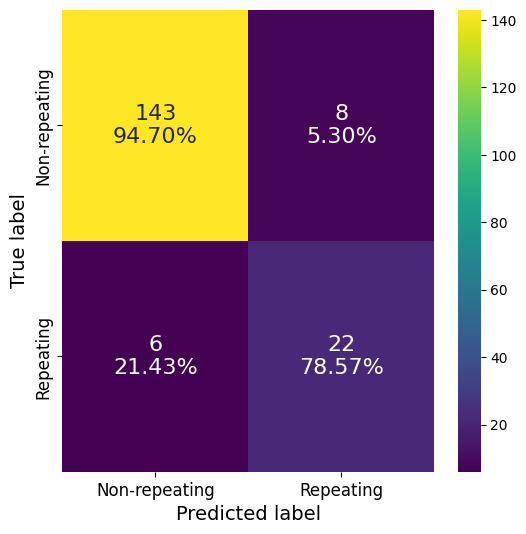

In [12]:
import seaborn as sns

labels = np.array([["{0}\n{1:.2f}%".format(value, percent) for value, percent in zip(row, percent_row)] 
                   for row, percent_row in zip(cm, cm_percent)])
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=labels, fmt='', cmap='viridis', cbar=True, annot_kws={"size": 16})

# Adding labels and title
plt.xlabel("Predicted label", fontsize=14)
plt.ylabel("True label", fontsize=14)

# Customize tick labels
plt.xticks([0.5, 1.5], ["Non-repeating", "Repeating"], fontsize=12)
plt.yticks([0.5, 1.5], ["Non-repeating", "Repeating"], fontsize=12)

# Show the plot
plt.show()